#### Sử dụng pandas để đọc dữ liệu

In [160]:
# Set up, nhập thư viện

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [161]:
# Nhập dữ liệu

df = pd.read_csv('Case_study_CarPrice_Assignment.csv')

In [162]:
# xem 10 dòng ngẫu nhiên

df.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
62,63,0,mazda rx-4,gas,std,four,sedan,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10245.0
156,157,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0
187,188,2,volkswagen super beetle,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.0,68,4500,37,42,9495.0
81,82,3,mitsubishi g4,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.0
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5
162,163,0,toyota mark ii,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,28,34,9258.0
189,190,3,vw dasher,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595.0
41,42,0,honda civic,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945.0


In [163]:
# car_ID : Mã xe
# symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt
# đối an toàn, 3: có rủi ro)
# carName: Tên xe
# fueltype: Loại nhiên liệu
# aspiration: loại hút (turbo hoặc std)
# doornumber: Số lượng cửa
# carbody: Loại thân xe (sedan, wagon, hatchback)
# drivewheel: Loại bánh xe
# enginelocation: Vị trí động cơ
# wheelbase: Chiều dài cơ sở
# carlength: Chiều dài xe
# carwidth: Chiều rộng xe
# carheight: Chiều cao xe
# curbweight: Trọng lượng của xe khi không có người hoặc hành lý
# enginetype: Loại động cơ
# cylindernumber: Số lượng xi lanh đặt trong xe
# enginesize: Kích thước động cơ
# fuelsystem: Hệ thống nhiên liệu của xe ô tô
# boreratio: Tỉ số hành trình
# stroke: số kỳ hoăc kích thước bên trong động cơ
# compressionratio: Tỉ số nén của ôtô
# horsepower: Mã lực
# peakrpm: Tốc độ động cơ cao nhất
# citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố
# highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc
# price: Giá xe


In [164]:
# xem DL có bao nhiêu cột, dòng

df.shape

(205, 26)

## Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu 

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

##### Nhận xét: 
dữ liệu không có dữ liệu thiếu

In [166]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [167]:
# Thay thế các giá trị của cột cylindernumber và doornumber từ kiểu 
# dữ liệu obj sang int

In [168]:
df.cylindernumber

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

In [169]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [170]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [171]:
df['doornumber'] = df['doornumber'].replace({'two':2, 'four':4})
df['cylindernumber'] = df['cylindernumber'].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8})

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [172]:
df.cylindernumber

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [173]:
# Xem thông kê mô tả của dữ liệu

df.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [174]:
df.CarName

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
                 ...           
200             volvo 145e (sw)
201                 volvo 144ea
202                 volvo 244dl
203                   volvo 246
204                 volvo 264gl
Name: CarName, Length: 205, dtype: object

In [175]:
# tách cột BrandName 

df['BrandName'] = df['CarName'].str.split(' ').str[0]
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,BrandName
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [176]:
df['BrandName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

## Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định

Nhận xét các thuộc tính gây ảnh hưởng tới giá


##### Hướng làm:

1.trực quan hoá

2.vẽ biểu đồ scatter/line plot với biến định lượng

bar plot với biến định tính

--> thấy biến nào có tương quan thì thử chạy kiểm định giả thuyết tương quan

In [177]:
# tách dữ liệu thành 2 phần: gồm các biến định lượng và phần định tính

# df1 gồm các cột có kiểu float hoặc int
df1 = df[['cylindernumber', 'doornumber', 'car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
df1.head()

,cylindernumber,doornumber,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,4,2,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,4,2,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,6,2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,4,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [178]:
# df2 gồm các cột định lượng và cột price
 
df2 = df[['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'price']]
df2.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,price
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,13495.0
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,16500.0
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,13950.0
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,17450.0


In [179]:
# bảng df1 xem mối quan hệ giữa các biến độc lập với biến dự đoán price

df1_corr = df1.corr()
df1_corr

,cylindernumber,doornumber,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
cylindernumber,1.000000,-0.016009,-0.094493,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
doornumber,-0.016009,1.000000,0.190352,-0.664073,0.447357,0.398568,0.207168,0.552208,0.197379,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
car_ID,-0.094493,0.190352,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.113129,-0.664073,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.339507,0.447357,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.430672,0.398568,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.545007,0.207168,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.013995,0.552208,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.609727,0.197379,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.846031,0.020742,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145


In [180]:
df1_corr[df1_corr['price'] > 0.5]

,cylindernumber,doornumber,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
cylindernumber,1.000000,-0.016009,-0.094493,-0.113129,0.339507,0.430672,0.545007,-0.013995,0.609727,0.846031,0.231399,0.008210,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
wheelbase,0.339507,0.447357,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.430672,0.398568,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.545007,0.207168,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
curbweight,0.609727,0.197379,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.846031,0.020742,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.231399,0.119258,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
horsepower,0.692016,-0.126947,-0.015006,0.070873,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139
price,0.718305,0.031835,-0.109093,-0.079978,0.577816,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599,1.000000


# Nhận xét:
từ bảng trên ta có thể nhận thấy một số biến có mối quan hệ với biến 'price' là các biến

cylindernumber, wheelbase,carlength, carwidth, curbweight, enginesize, boreratio, horsepower	

--> chạy kiểm định tương quan -> chạy 8 lần kiểm định

In [181]:
# Nhập thư viện
from scipy import stats

In [182]:
# Kiểm định Giữa cylindernumber và price có tương quan với nhau hay không

df1_1 = df1[['cylindernumber', 'price']]

print(stats.pearsonr(df1_1['cylindernumber'], df1_1['price']))

PearsonRResult(statistic=0.7183049020002832, pvalue=8.028863372444613e-34)


### nhận xét: pvalue=8.028863372444613e-34 < 0.05 
--> bác bỏ H0 -> tức là 2 thuộc tính này (cylindernumber và price) có tương quan

In [183]:
# Kiểm định Giữa wheelbase và price có tương quan với nhau hay không

df1_2 = df1[['wheelbase', 'price']]

print(stats.pearsonr(df1_2['wheelbase'], df1_2['price']))

PearsonRResult(statistic=0.5778155982921502, pvalue=1.1828204863376843e-19)


### nhận xét: pvalue=1.1828204863376843e-19 < 0.05
--> bác bỏ H0 -> tức là 2 thuộc tính này (wheelbase và price) có tương quan

In [184]:
# carlength và price 

df1_3 = df1[['carlength', 'price']]

print(stats.pearsonr(df1_3['carlength'], df1_3['price']))

PearsonRResult(statistic=0.682920015677962, pvalue=1.6787066240746824e-29)


### nhận xét: pvalue=1.6787066240746824e-29 < 0.05
--> bác bỏ H0 -> tức là 2 thuộc tính này (carlength và price) có tương quan

In [185]:
# carwidth và price 

df1_4 = df1[['carwidth', 'price']]

print(stats.pearsonr(df1_4['carwidth'], df1_4['price']))

PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876119045e-40)


### nhận xét: pvalue=9.627437876119045e-40 < 0.05
--> bác bỏ H0 -> tức là 2 thuộc tính này (carwidth và price) có tương quan

In [186]:
# curbweight và price  
df1_5 = df1[['curbweight', 'price']]

print(stats.pearsonr(df1_5['curbweight'], df1_5['price']))

PearsonRResult(statistic=0.8353048793372966, pvalue=1.2144448264032194e-54)


### nhận xét: pvalue=1.2144448264032194e-54 < 0.05
--> bác bỏ H0 -> tức là 2 thuộc tính này (curbweight và price) có tương quan

In [187]:
# enginesize và price 

df1_6 = df1[['enginesize', 'price']]

print(stats.pearsonr(df1_6['enginesize'], df1_6['price']))

PearsonRResult(statistic=0.8741448025245117, pvalue=1.3547637598649229e-65)


### nhận xét: pvalue=1.3547637598649229e-65 < 0.05
--> bác bỏ H0 -> tức là 2 thuộc tính này (enginesize và price) có tương quan

In [188]:
# boreratio và price  
df1_7 = df1[['boreratio', 'price']]

print(stats.pearsonr(df1_7['boreratio'], df1_7['price']))

PearsonRResult(statistic=0.5531732367984437, pvalue=7.90792227824885e-18)


### nhận xét: pvalue=7.90792227824885e-18 < 0.05
--> bác bỏ H0 -> tức là 2 thuộc tính này (boreratio và price) có tương quan

In [189]:
# highwaympg và price 
df1_8 = df1[['horsepower', 'price']]

print(stats.pearsonr(df1_8['horsepower'], df1_8['price']))

PearsonRResult(statistic=0.8081388225362217, pvalue=1.4834365732939108e-48)


### nhận xét: pvalue=1.4834365732939108e-48 < 0.05
--> bác bỏ H0 -> tức là 2 thuộc tính này (horsepower và price) có tương quan

## Nhận xét: 

Sau khi chạy kiếm định tương quan các biến cylindernumber, wheelbase,carlength, carwidth, curbweight, enginesize, boreratio, horsepower với giá (price)

thì thấy được rằng các biến đều có mối tương quan với giá. 
Các giá trị statistic >0 cho nên có thể thấy được đây là tương quan thuận

## Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình

<Axes: >

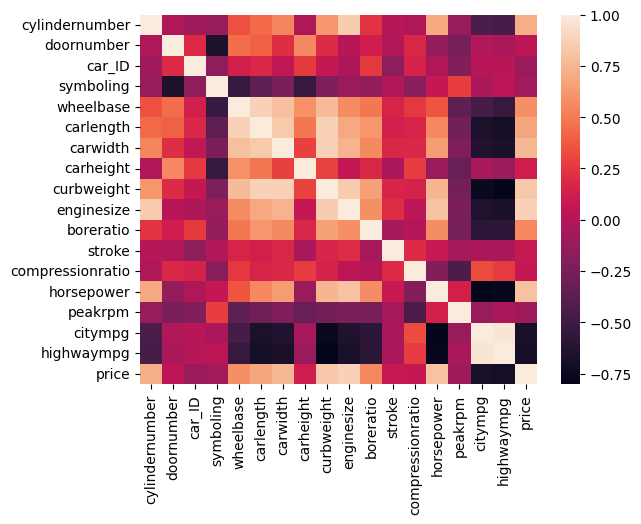

In [190]:
# vẽ biểu đồ heatmap của bảng df1 (các biến định lượng)

df1_corr = df1.corr()
sns.heatmap(df1_corr)

#### Nhận xét: 
Nhìn vào hình trên ta thấy ở cột price thì các cột biến cylindernumber, wheelbase,carlength, carwidth, curbweight, enginesize, boreratio, highwaympg

có tương quan với biến giá trong đó biến enginesize có tương quan nhất (màu nhạt nhạt nhất). 

ĐÃ CHẠY KIỂM ĐỊNH TƯƠNG QUAN Ở TRÊN

#### Làm mô hình hồi quy tuyến tính 1 biến enginesize với biến price

In [191]:
# Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

X = df1[['enginesize']]
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

# Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là giá, các biến đầu vào là các trường còn lại.

lr = LinearRegression()
lr.fit(X_train, y_train)

# Đánh giá mô hình.
from sklearn import metrics
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2823.4182686419
Mean Squared Error: 15137823.22635365
Root Mean Squared Error: 3890.735563663207


#### Giải thích các chỉ số trên:
Mean Absolute Error = 2823.4182686419: trung bình giá dự đoán đang lệch khỏi giá trung bình thật 2823 (đv tiền tệ)

Root Mean Squared Error = 3890.735563663207: nếu đánh giá kết quả chặt chẽ hơn, thì trung bình giá dự đoán đang lệch khỏi giá trung bình thật 3890 (đv tiền tệ)

giá trung bình là 13276, đọ lệch chuẩn 7988--> giá trị giá lệch là thấp < std, do vậy mô hình này chấp nhận được

## Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu

In [192]:
# tiến hành dummy các biến bảng df2 (trừ biến price)

dummy = pd.get_dummies(df2.drop(['price'], axis=1)).astype(int)
dummy

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
202,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature selection để chọn các thuộc tính tốt nhất.

In [193]:
# nối bảng dummy với cột price

dummy1 = pd.concat([dummy, df2[['price']]], axis=1)
dummy1

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13495.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16500.0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16500.0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13950.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,16845.0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,19045.0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,21485.0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,22470.0


In [194]:
# tìm thuộc tính có mối quan hệ với biến price ở bảng dummy1

d = dummy1.corr()
d

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
CarName_Nissan versa,1.000000,-0.004902,-0.004902,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,0.101606,-0.008532,-0.023020,-0.004902,-0.064430,-0.015003,-0.004902,-0.068330
CarName_alfa-romero Quadrifoglio,-0.004902,1.000000,-0.004902,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.028318
CarName_alfa-romero giulia,-0.004902,-0.004902,1.000000,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.001918
CarName_alfa-romero stelvio,-0.004902,-0.004902,-0.004902,1.000000,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.028318
CarName_audi 100 ls,-0.004902,-0.004902,-0.004902,-0.004902,1.000000,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.005915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_mfi,-0.004902,-0.004902,-0.004902,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902,-0.002747
fuelsystem_mpfi,-0.064430,0.076082,0.076082,0.076082,0.076082,0.107861,0.076082,0.076082,0.076082,0.076082,...,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430,0.517075
fuelsystem_spdi,-0.015003,-0.015003,-0.015003,-0.015003,-0.015003,-0.021270,-0.015003,-0.015003,-0.015003,-0.015003,...,-0.030229,-0.051026,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003,-0.061475
fuelsystem_spfi,-0.004902,-0.004902,-0.004902,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,-0.064430,-0.015003,1.000000,-0.019580


In [195]:
d['price'].describe()

count    177.000000
mean       0.010558
std        0.152001
min       -0.601950
25%       -0.052552
50%       -0.026582
75%        0.042357
max        1.000000
Name: price, dtype: float64

In [196]:
# Lọc ra các dòng ở bảng d trên mà có cột price >0

d1 = d[d['price'] >0]
d1

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
CarName_alfa-romero Quadrifoglio,-0.004902,1.000000,-0.004902,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.028318
CarName_alfa-romero giulia,-0.004902,-0.004902,1.000000,-0.004902,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.001918
CarName_alfa-romero stelvio,-0.004902,-0.004902,-0.004902,1.000000,-0.004902,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.028318
CarName_audi 100 ls,-0.004902,-0.004902,-0.004902,-0.004902,1.000000,-0.006949,-0.004902,-0.004902,-0.004902,-0.004902,...,-0.009877,-0.016672,-0.048245,-0.008532,-0.023020,-0.004902,0.076082,-0.015003,-0.004902,0.005915
CarName_audi 100ls,-0.006949,-0.006949,-0.006949,-0.006949,-0.006949,1.000000,-0.006949,-0.006949,-0.006949,-0.006949,...,-0.014002,-0.023635,-0.068396,-0.012096,-0.032636,-0.006949,0.107861,-0.021270,-0.006949,0.053598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
enginetype_ohcf,-0.019672,-0.019672,-0.019672,-0.019672,-0.019672,-0.027889,-0.019672,-0.019672,-0.019672,-0.019672,...,-0.039637,-0.066906,0.127119,-0.034242,-0.092384,-0.019672,0.004585,-0.060209,-0.019672,0.016285
enginetype_ohcv,-0.018218,0.269069,-0.018218,-0.018218,-0.018218,-0.025828,-0.018218,-0.018218,-0.018218,-0.018218,...,-0.036707,-0.061961,-0.179302,-0.031711,-0.085556,-0.018218,0.282760,-0.055759,-0.018218,0.385991
fuelsystem_idi,-0.023020,-0.023020,-0.023020,-0.023020,-0.023020,-0.032636,-0.023020,-0.023020,-0.023020,-0.023020,...,-0.046383,-0.078293,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020,0.105679
fuelsystem_mpfi,-0.064430,0.076082,0.076082,0.076082,0.076082,0.107861,0.076082,0.076082,0.076082,0.076082,...,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430,0.517075


In [197]:
# Lọc ra các dòng ở bảng d trên mà có cột price có giá trị >0.3

d2 = d[d['price'] >0.3]
d2

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
drivewheel_rwd,-0.053740,0.091216,0.091216,0.091216,-0.053740,-0.076187,-0.053740,-0.053740,-0.053740,-0.053740,...,0.183789,-0.182771,-0.464056,0.158772,0.122035,-0.053740,0.448977,-0.115182,0.091216,0.638957
enginelocation_rear,-0.008532,-0.008532,-0.008532,-0.008532,-0.008532,-0.012096,-0.008532,-0.008532,-0.008532,-0.008532,...,-0.017192,-0.029019,-0.083975,-0.014851,-0.040070,-0.008532,0.132429,-0.026114,-0.008532,0.324973
enginetype_ohcv,-0.018218,0.269069,-0.018218,-0.018218,-0.018218,-0.025828,-0.018218,-0.018218,-0.018218,-0.018218,...,-0.036707,-0.061961,-0.179302,-0.031711,-0.085556,-0.018218,0.282760,-0.055759,-0.018218,0.385991
fuelsystem_mpfi,-0.064430,0.076082,0.076082,0.076082,0.076082,0.107861,0.076082,0.076082,0.076082,0.076082,...,-0.059039,-0.219128,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430,0.517075
price,-0.068330,0.028318,0.001918,0.028318,0.005915,0.053598,0.093110,0.049579,0.040259,0.017336,...,-0.004544,-0.170945,-0.501374,-0.017306,0.105679,-0.002747,0.517075,-0.061475,-0.019580,1.000000


### Như vậy có thể thấy được chỉ có 4 biến category có mối quan hệ với giá (price)

drivewheel_rwd, enginelocation_rear, enginetype_ohcv, fuelsystem_mpfi	

##### Ở đây mình có nên chạy kiểm định tương quan 4 biến 
drivewheel_rwd, enginelocation_rear, enginetype_ohcv, fuelsystem_mpfi	

với giá không?

In [ ]:
# highwaympg và price 
# df1_8 = df1[['horsepower', 'price']]

# print(stats.pearsonr(df1_8['horsepower'], df1_8['price']))

In [198]:
# mình sẽ nối 4 cột biến này ở bảng dummy với 8 cột biến định lượng ở trên bảng df1 mình đã phân tích có tương quan với giá 
# đế tiến hành chạy mô hình hồi quy tuyến tính

df3 = pd.concat([dummy[['drivewheel_rwd', 'enginelocation_rear', 'enginetype_ohcv', 'fuelsystem_mpfi']],
                df1[['cylindernumber', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']]], 
                 axis=1)
df3

,drivewheel_rwd,enginelocation_rear,enginetype_ohcv,fuelsystem_mpfi,cylindernumber,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,1,0,0,1,4,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,1,0,0,1,4,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,1,0,1,1,6,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,0,0,0,1,4,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,0,0,0,1,5,99.4,176.6,66.4,2824,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,1,4,109.1,188.8,68.9,2952,141,3.78,114,16845.0
201,1,0,0,1,4,109.1,188.8,68.8,3049,141,3.78,160,19045.0
202,1,0,1,1,6,109.1,188.8,68.9,3012,173,3.58,134,21485.0
203,1,0,0,0,6,109.1,188.8,68.9,3217,145,3.01,106,22470.0


##### Chạy mô hình hồi quy tuyến tính trên bảng df3 

In [199]:
# Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

X = df3.drop(['price'], axis=1)
y = df3['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [200]:
# Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là giá, các biến đầu vào là các trường còn lại.

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [201]:
# Đánh giá mô hình.
from sklearn import metrics
y_pred = lr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1817.4275981159633
Mean Squared Error: 6149638.856744014
Root Mean Squared Error: 2479.8465389503467


In [202]:
df3['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

#### Giải thích các chỉ số trên:
Mean Absolute Error = 1820.297: trung bình giá dự đoán đang lệch khỏi giá trung bình thật 1817 (đv tiền tệ)

Root Mean Squared Error = 2499: nếu đánh giá kết quả chặt chẽ hơn, thì trung bình giá dự đoán đang lệch khỏi giá trung bình thật 2479 (đv tiền tệ)

giá trung bình là 13276, đọ lệch chuẩn 7988--> giá trị giá lệch  là thấp < std, do vậy mô hình này 
chấp nhận được

In [203]:
# Kiểm tra thêm giá trị  r2_score

score= r2_score(y_test,y_pred)
score

0.8368301644758835

#### Nhận xét thêm:

chỉ số này cho biết thêm mối quan hệ giữa các biến trục X và y.

chỉ số này  = 0.836 tương đương 83.6%, có thể thấy được mô hình khá tốt và phù hợp



## Xây dựng mô hình hồi quy tuyến tính trên các biến được chọn bởi phương pháp feature selection. Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS

### giá trị hồi quy tuyến tính bằng phương pháp bình phương tối thiểu (OLS)

In [204]:
import statsmodels.api as sm

In [205]:
X2 = sm.add_constant(X_train)
model_stats = sm.OLS(y_train.values.reshape(-1,1), X2).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     89.14
Date:                Sun, 21 Jan 2024   Prob (F-statistic):           3.87e-62
Time:                        17:02:49   Log-Likelihood:                -1542.4
No. Observations:                 164   AIC:                             3111.
Df Residuals:                     151   BIC:                             3151.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.697e+04   1.45e+04     -3.235      0.001   -7.57e+04   -1.83e+04
drivewheel_rwd       2159.4781    754.194      2.863      0.005     669.343    3649.613
enginelocation_rear  1.226e+04   2275.387      5.386      0.000    7759.445    1.68e+04
enginetype_ohcv     -3442.9467   1530.394     -2.250      0.026   -6466.697    -419.196
fuelsystem_mpfi       320.9328    678.337      0.473      0.637   -1019.325    1661.191
cylindernumber        202.4683    627.574      0.323      0.747   -1037.492    1442.428
wheelbase              86.8225    102.679      0.846      0.399    -116.052     289.696
carlength             -45.0446     61.079     -0.737      0.462    -165.724      75.635
carwidth              757.8701    274.742      2.758      0.007     215.035    1300.705
curbweight              2.1774      1.607      1.355      0.178      -0.998       5.353
enginesize             97.9383     22.057      4.440      0.000      54.359     141.518
boreratio           -3948.4560   1705.353     -2.315      0.022   -7317.890    -579.022
horsepower             28.3070     16.121      1.756      0.081      -3.544      60.158
==============================================================================
Omnibus:                       26.522   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.713
Skew:                           0.595   Prob(JB):                     2.20e-17
Kurtosis:                       6.132   Cond. No.                     1.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Nhận xét:
Ở mô hình OLS này cho giá trị
R-squared:	0.876

cho thấy mối quan hệ giữa các biến trục X và y tương đối cao 87.6%, mô hình khá tốt và phù hợp

### Đa cộng tuyến trong tiếng Anh là Multicollinearity. 
Đa cộng tuyến là hiện tượng các biến độc lập trong mô hình hồi qui phụ thuộc tuyến tính lẫn nhau, thể hiện dưới dạng hàm số (vi phạm giả định 5 của mô hình hồi qui tuyến tính)

## Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

Ở mô hình đầu tiên cho giá trị r2 =  0.836

Ở mô hình thứ 2 (theo phương pháp OLS) cho giá trị r2 = 0.876

Cho thấy mô hình thứ 2 tốt và phù hợp hơn mô hình 1.